
# Visualizing Earnings Based On College Majors


Dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column)

Major_code - Major code

Major - Major description

Major_category - Category of major

Total - Total number of people with major

Sample_size - Sample size (unweighted) of full-time

Men - Male graduates

Women - Female graduates

ShareWomen - Women as share of total

Employed - Number employed

Median - Median salary of full-time, year-round workers

Low_wage_jobs - Number in low-wage service jobs

Full_time - Number employed 35 hours or more

Part_time - Number employed less than 35 hours.


### Questions
Do students in more popular majors make more money?

How many majors are predominantly male? Predominantly female?

Which category of majors have the most students?


### import userful libraries

In [70]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os
from IPython.display import display

### Read in the data

In [71]:
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\DataScience\\Projects\\Earnings_ByCollegeMajors'

In [72]:
recent_grads = pd.read_csv("recent-grads.csv",
                           encoding="utf-8-sig",
                           engine='python')

### first row of the dataframe

In [73]:
display(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

### first 5 and last 5 rows

In [74]:
display(recent_grads.head())
print('\n')
display(recent_grads.tail())

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


### Summary satatistics

In [75]:
display(recent_grads.describe())

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Dropping rows with missing values

In [76]:
#No. of rows before dropping rows with nan
len(recent_grads)

173

In [77]:
recent_grads=recent_grads.dropna()

In [78]:
#No. of rows after dropping rows with nan
len(recent_grads)

172

In [79]:
print(recent_grads.dtypes)

Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object


## Do students in more popular majors make more money?

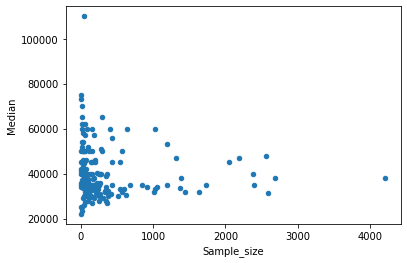

In [80]:
recent_grads.plot(x='Sample_size', y='Median',kind='scatter')

In [81]:
recent_grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

In [82]:
salaries=[]
for salary in recent_grads['Median'].to_list():
    if salary<30000:
        salaries.append('Low')
    elif salary>30000 and salary<=55000:
        salaries.append('Medium')
    else:
        salaries.append('High')
len(salaries)
recent_grads['Salary_Category']=salaries
recent_grads['Salary_Category'].value_counts()

Medium    131
High       26
Low        15
Name: Salary_Category, dtype: int64

In [83]:
recent_grads['Sample_size'].describe()

count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64

In [84]:
sizes=[]
for size in recent_grads['Sample_size'].to_list():
    if size<100:
        sizes.append('Unpopular')
    elif size>100 and size<=1000:
        sizes.append('Medium')
    else:
        sizes.append('Popular')
len(sizes)
recent_grads['Size_Category']=sizes
recent_grads['Size_Category'].value_counts()

Medium       77
Unpopular    75
Popular      20
Name: Size_Category, dtype: int64

In [85]:
for_pop_majors=recent_grads[recent_grads['Size_Category']=='Popular']
for_pop_majors['Salary_Category'].value_counts()

Medium    19
High       1
Name: Salary_Category, dtype: int64

Only 1 student categorized to be from a popular major has a high salary. As shown on the scatterplot also Students in more popular majors do not necessarily make more money; majors with high sample size(representation) seem to have median salaries somewhere in the middle

## How many majors are predominantly male? Predominantly female?

In [86]:
major_males=[]
major_females=[]
for i, row in recent_grads.iterrows():
    if row['Men']>row['Women']:
        major_males.append(row['Major'])
    elif row['Men']<row['Women']:
        major_females.append(row['Major'])
display(major_males)
print('\n')
display(major_females)

['PETROLEUM ENGINEERING',
 'MINING AND MINERAL ENGINEERING',
 'METALLURGICAL ENGINEERING',
 'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
 'CHEMICAL ENGINEERING',
 'NUCLEAR ENGINEERING',
 'ACTUARIAL SCIENCE',
 'MECHANICAL ENGINEERING',
 'ELECTRICAL ENGINEERING',
 'COMPUTER ENGINEERING',
 'AEROSPACE ENGINEERING',
 'BIOMEDICAL ENGINEERING',
 'MATERIALS SCIENCE',
 'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
 'BIOLOGICAL ENGINEERING',
 'INDUSTRIAL AND MANUFACTURING ENGINEERING',
 'GENERAL ENGINEERING',
 'ARCHITECTURAL ENGINEERING',
 'COURT REPORTING',
 'COMPUTER SCIENCE',
 'ELECTRICAL ENGINEERING TECHNOLOGY',
 'MATERIALS ENGINEERING AND MATERIALS SCIENCE',
 'MANAGEMENT INFORMATION SYSTEMS AND STATISTICS',
 'CIVIL ENGINEERING',
 'CONSTRUCTION SERVICES',
 'OPERATIONS LOGISTICS AND E-COMMERCE',
 'MISCELLANEOUS ENGINEERING',
 'ENVIRONMENTAL ENGINEERING',
 'ENGINEERING TECHNOLOGIES',
 'MISCELLANEOUS FINE ARTS',
 'GEOLOGICAL AND GEOPHYSICAL ENGINEERING',
 'FINANCE',
 'ECONOMICS',
 'BUSINESS ECON

['ASTRONOMY AND ASTROPHYSICS',
 'PUBLIC POLICY',
 'NURSING',
 'NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES',
 'ACCOUNTING',
 'MEDICAL TECHNOLOGIES TECHNICIANS',
 'STATISTICS AND DECISION SCIENCE',
 'PHARMACOLOGY',
 'OCEANOGRAPHY',
 'MEDICAL ASSISTING SERVICES',
 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
 'SCHOOL STUDENT COUNSELING',
 'INTERNATIONAL RELATIONS',
 'INTERNATIONAL BUSINESS',
 'PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION',
 'MOLECULAR BIOLOGY',
 'GENETICS',
 'MISCELLANEOUS SOCIAL SCIENCES',
 'INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY',
 'CHEMISTRY',
 'MARKETING AND MARKETING RESEARCH',
 'MICROBIOLOGY',
 'BIOCHEMICAL SCIENCES',
 'BOTANY',
 'HUMAN RESOURCES AND PERSONNEL MANAGEMENT',
 'PRE-LAW AND LEGAL STUDIES',
 'MISCELLANEOUS HEALTH MEDICAL PROFESSIONS',
 'GEOSCIENCES',
 'SOCIAL PSYCHOLOGY',
 'ENVIRONMENTAL SCIENCE',
 'COMMUNICATIONS',
 'COMMERCIAL ART AND GRAPHIC DESIGN',
 'JOURNALISM',
 'MULTI-DISCIPLINARY OR GENERAL SCIENCE',
 'ADVERTISING AND PUBLIC R

In [87]:
print(len(major_males))
print(len(major_females))

76
96


76 Majors are predominantly male while females dominate in 96 majors

## Which category of majors have the most students?

In [90]:
recent_grads.groupby('Major_category').sum().sort_values(by='Total',ascending=False)['Total']

Major_category
Business                               1302376.0
Humanities & Liberal Arts               713468.0
Education                               559129.0
Engineering                             537583.0
Social Science                          529966.0
Psychology & Social Work                481007.0
Health                                  463230.0
Biology & Life Science                  453862.0
Communications & Journalism             392601.0
Arts                                    357130.0
Computers & Mathematics                 299008.0
Industrial Arts & Consumer Services     229792.0
Physical Sciences                       185479.0
Law & Public Policy                     179107.0
Agriculture & Natural Resources          75620.0
Interdisciplinary                        12296.0
Name: Total, dtype: float64

Business,Humanities & Liberal Arts seem to have the most number of students while Interdisciplianry, agriculture and natural resources,Law & Public Policy as well as physical sciences have the least number of students